In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

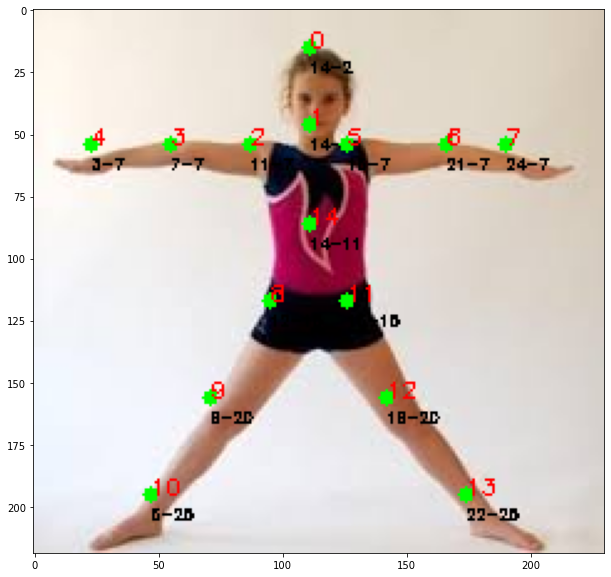

In [2]:
image = cv2.imread("images/image_star_shape.jpg")
image_blob = cv2.dnn.blobFromImage(image = image, scalefactor = 1.0 / 255, size = (image.shape[1], image.shape[0]))
network = cv2.dnn.readNetFromCaffe("weights/pose_deploy_linevec_faster_4_stages.prototxt",
                                   "weights/pose_iter_160000.caffemodel")

network.setInput(image_blob)
output = network.forward()
position_width = output.shape[3]
position_height = output.shape[2]
num_points = 15
points = []
threshold = 0.1 # get points where confidence is greater than 0.1

for i in range(num_points):
    confidence_map = output[0, i, :, :]
    _, confidence, _, point = cv2.minMaxLoc(confidence_map) 
    # get the right x and y position on the image
    x = int((image.shape[1] * point[0]) / position_width)
    y = int((image.shape[0] * point[1]) / position_height)
  
    if confidence > threshold:
        cv2.circle(image, (x, y), 3, (0,255,0), thickness = -1)
        cv2.putText(image, "{}".format(i), (x, y), cv2.FONT_HERSHEY_SIMPLEX, .3, (0, 0, 255))
        cv2.putText(image, '{}-{}'.format(point[0], point[1]), (x, y + 10), cv2.FONT_HERSHEY_SIMPLEX, .2, (0,0,0))
        points.append((x, y))
    else:
        points.append(None)

plt.figure(figsize = [14,10])
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [3]:
def straight_arms(points):
    right_wrist, right_elbow, left_wrist, left_elbow = 0, 0, 0, 0
    left_hip, right_hip = 0, 0
    left_ankle, right_ankle = 0, 0
    for i, point in enumerate(points):
        #print(i, point)
        if i == 4:
            right_wrist = point[1]
            print()
        elif i == 3:
            right_elbow = point[1]
        elif i == 6:
            left_elbow = point[1]
        elif i == 7:
            left_wrist = point[1]
        elif i == 11:
            left_hip = point[0]
        elif i == 8:
            right_hip = point[0]
        elif i == 13:
            left_ankle = point[0]
        elif i == 10:
            right_ankle = point[0]
  
  #print(head, right_wrist, left_wrist)
    if right_wrist == right_elbow and left_wrist == left_elbow and (left_ankle > left_hip) and (right_ankle < right_hip):
        print("Star Shape detected")
    else:
        print("No star shape detected")
    
straight_arms = straight_arms(points)
straight_arms


Star Shape detected
